In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
DATA_DIR = "../data/llm"
file_prefix = "AzureLLMInferenceTrace_"
inference_type = "conv" # "conv" or "code"

In [5]:
file = file_prefix + inference_type + ".csv"
filepath = os.path.join(DATA_DIR, file)
print("loading " + filepath)
data = pd.read_csv(filepath)
data["TIMESTAMP"] = pd.to_datetime(data["TIMESTAMP"])
data

loading ../data/llm/AzureLLMInferenceTrace_conv.csv


,TIMESTAMP,ContextTokens,GeneratedTokens
0,2023-11-16 18:15:46.680590,374,44
1,2023-11-16 18:15:50.995169,396,109
2,2023-11-16 18:15:51.222467,879,55
3,2023-11-16 18:15:51.391017,91,16
4,2023-11-16 18:15:52.573245,91,16
...,...,...,...
19361,2023-11-16 19:14:04.144233,1131,397
19362,2023-11-16 19:14:04.560504,399,181
19363,2023-11-16 19:14:04.710779,1120,466
19364,2023-11-16 19:14:07.740844,1030,434


In [9]:
first_ts = data["TIMESTAMP"][0]
arrival_times = [(ts - first_ts).total_seconds() for ts in data["TIMESTAMP"]]
arrival_times

[0.0,
 4.314579,
 4.541877,
 4.710427,
 5.8926549999999995,
 6.311529,
 7.745497,
 8.251431,
 8.337079,
 8.464985,
 8.700213,
 9.427468,
 9.582558,
 10.106379,
 10.546126,
 11.157911,
 11.430904,
 11.836632999999999,
 12.886545,
 13.025088,
 13.049843,
 14.05955,
 14.09778,
 14.293309,
 17.420918,
 17.792938,
 18.160513,
 18.463892,
 18.979439,
 19.913927,
 19.945197,
 20.478941,
 20.658352999999998,
 20.941916,
 21.370065,
 21.375087,
 22.712872,
 22.994856,
 23.371403,
 24.146296,
 24.768385,
 24.894961,
 25.081422,
 25.223379,
 25.24984,
 25.324254,
 25.917107,
 26.254478,
 26.407057000000002,
 26.461144,
 27.330266,
 27.552529,
 28.090234,
 28.353357,
 28.578535,
 28.607772,
 28.764379,
 29.340288,
 29.686078,
 30.181499,
 31.269171,
 31.62049,
 31.760229,
 31.917003,
 32.388505,
 33.235882,
 33.413528,
 33.491001,
 33.52677,
 33.645713,
 33.748702,
 33.825,
 33.932529,
 34.746446,
 35.294069,
 36.138512,
 36.520417,
 36.864739,
 37.124806,
 37.475965,
 38.15493,
 38.392642,
 38.54

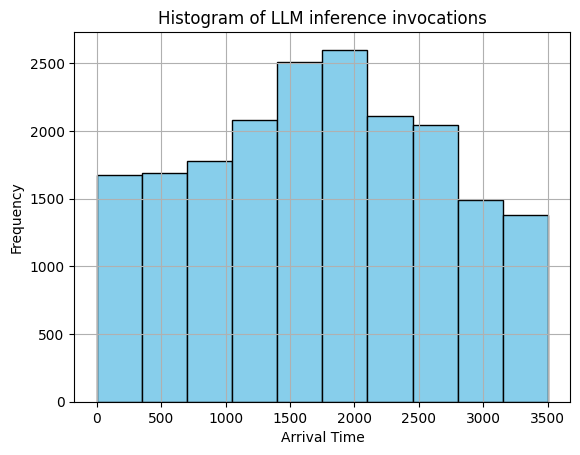

In [13]:
plt.hist(arrival_times, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of LLM inference invocations')
plt.xlabel('Arrival Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()